In [1]:
pip install python-igraph==0.10.8

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt

import random
import igraph as ig
from IPython.display import display

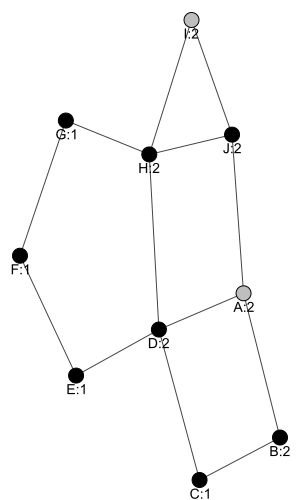

In [2]:

#g = ig.Graph(n=8,edges=[(3, 2), (3, 4), (2, 1), (1, 6),(1,4), (5, 3), (2, 0), (7, 3), (7,6), (7, 4)], directed=False)
import igraph as ig

g = ig.Graph(n=10, edges=[(i, (i + 1) % 10) for i in range(10)], directed=False)

# Add additional edges to form a small cluster
g.add_edges([(0, 3), (3, 7), (7, 9)])

# Choose a random seed set of 3 vertices
seed_set = random.sample(range(10), 1)
og_seed_set=seed_set

active_nodes = set(seed_set)
iteration = 1

node_threshold = [random.randint(1, 2) for _ in range(10)]

id_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',8:'I', 9:'J'}


# Define node labels (Letter and threshold) for visualisation
vertex_labels = [f"{id_to_letter[id]}:{thresh}" for id, thresh in enumerate(node_threshold)]

visual_style = {
    "vertex_label": vertex_labels,  # Label nodes with letters, threshold
    "vertex_label_dist": 1,  
    "vertex_color": ["gray" if v in active_nodes else "black" for v in range(8)],
    "vertex_size": 15,
    "layout": g.layout("kk"),
    "bbox": (300, 500)
    
}

ig.plot(g, **visual_style)
    

Iteration 1: Active Nodes: ['A']


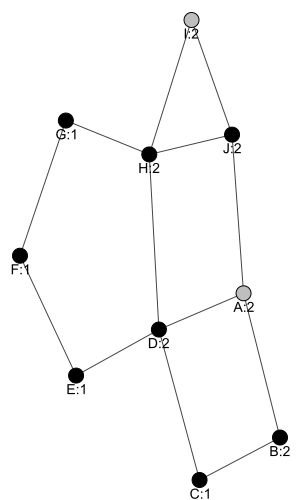

Press Enter to continue to the next iteration...
No change in active nodes. Stopping the diffusion process.


In [3]:
ig.plot(g, **visual_style)

# Diffusion process loop
iteration = 1
while True:
    print(f"Iteration {iteration}: Active Nodes: {[id_to_letter[id] for id in seed_set]}")
    

    new_active_nodes = set(seed_set)
    
    for node in range(8):
        if node not in seed_set:
            neighbors = set(g.neighbors(node))
            influenced_neighbors = [n for n in neighbors if n in seed_set]
            if len(influenced_neighbors) >= node_threshold[node]:
                new_active_nodes.add(node)
    new_active_nodes = list(new_active_nodes)
    
    
    # Visualization: Draw the graph with updated active nodes
    visual_style["vertex_color"] = ["gray" if v in og_seed_set else "yellow" if v in new_active_nodes else "black" for v in range(8)]
    
    display(ig.plot(g, **visual_style))  # Move this line outside the loop to display the graph after each iteration
    
    input("Press Enter to continue to the next iteration...")
    
    # Check if active nodes have changed, if not, break out of the loop
    if new_active_nodes == seed_set:
        print("No change in active nodes. Stopping the diffusion process.")
        break
    
    seed_set = new_active_nodes
    iteration += 1